<a href="https://colab.research.google.com/github/ys23-lys/ESAA/blob/main/ESAA_YB_WEEK13_%ED%95%84%EC%82%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [내용 정리]

## 05. DGSCAN

### DBSCAN 개요

**DBSCAN**(Density Based Spatial Clustering of Applications with Noise): 밀도 기반 군집화의 대표적인 알고리즘
- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능.
- 특정 공간 내에 **데이터 밀도 차이**를 기반 알고리즘으로 함.

DBSCAN 중요 파라미터
- **입실론 주변 영역**(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역.
- **최소 데이터 개수**(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수.

+) 데이터 포인트 정의
- **핵심 포인트**(Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
- **이웃 포인트**(Neighbor Point): 주변 영역 내에 위치한 타 데이터
- **경계 포인트**(Border Point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 보유 X + 핵심 포인트를 이웃 포인트로 가지는 데이터
- **잡음 포인트**(Noise Point): 최소 데이터 개수 이상의 이웃 포인트 보유 X + 핵심 포인트도 이웃 포인트로 보유 X

DBSCAN 군집화
1. 특정 입실론 반경 내에 포함될 최소 데이터 세트를 n개로 가정.
2. 특정 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 n-1개 이상일 시 특정 데이터는 **핵심 포인트**
3. 핵심 포인트의 이웃 데이터 포인트가 핵심 포인트일 경우 직접 접근 가능. -> 직접 접근 가능한 핵심 포인트를 연결하며 군집화 구성.

DBSCAN 초기화 파라미터
- **eps**: 입실론 주변 영역의 반경.
- **min_samples**: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수.

### DBSCAN 적용하기 - 붓꽃 데이터 세트

eps=0.6(eps값은 1 이하의 값 지정)

min_samples=8

dbscan_cluster의 -1: 노이즈에 속하는 군집

-> 붓꽃 데이터 세트의 Target값의 유형 3가지가 군집 2가지로 군집화됨.

PCA로 2개의 피처로 압축 변환

세모로 표현된 값: 노이즈
- PCA를 2차원으로 표현하면 이상치인 노이즈 데이터가 명확하게 드러남.

eps를 0.6 -> **0.8** 변경

### DBSCAN 적용하기 - make_circles() 데이터 세트

**K-평균**으로 데이터 세트 군집화

**GMM**으로 데이터 세트 군집화

**DBSCAN**으로 군집화

## 06. 군집화 실습 - 고객 세그먼테이션

### 고객 세그먼테이션의 정의와 기법

고객 세그먼테이션(Customer Segmentation): 다양한 기준으로 고객을 분류하는 기법.
- 타깃 마케팅: 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공하는 것.
- 어떤 요소를 기반으로 군집화할 것인가가 중요.
- **RFM 기법**(Recency, Frequency, Monetary Value)

### 데이터 세트 로딩과 데이터 클렌징

Null 데이터 제거: CustomnerID가 Null. <- 제거

오류 데이터 삭제: Quantity, UnitPrice가 0보다 작은 경우. <- 제거

**불린 인덱싱** 이용.

### RFM 기반 데이터 가공

1. UnitPrice * Quantity = 주문 금액 데이터
2. CustomerNo를 int형으로 변경
3. Top5 주문 건수와 주문 금액을 가진 고객 데이터 추출
4. InvoiceNo + StockCode로 Groupby 수행 -> 1에 가깝게 유일한 식별자 레벨이 됨.

RFM 기반의 고객 세그먼테이션 - 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 세그먼테이션 수행.
-> 주문번호+상품코드 기준의 데이터를 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경.

DataFrameGroupby 객체에 agg() 이용.
- agg(대상 칼럼들, aggregation 함수명): 칼럼 여러 개의 서로 다른 aggregation 연산을 수행 가능.

### RFM 기반 고객 세그먼테이션

소매업체의 대규모 주문을 포함함. -> 왜곡된 데이터 분포도를 가짐. 군집화가 한쪽 군집에만 집충.

데이터 세트의 왜곡 정도를 낮추기 위해 데이터 값에 로그 적용. (로그 변환)

# [코드 필사]

## 05. DGSCAN

### DBSCAN 개요

**DBSCAN**(Density Based Spatial Clustering of Applications with Noise): 밀도 기반 군집화의 대표적인 알고리즘
- 데이터의 분포가 기하학적으로 복잡한 데이터 세트에도 효과적인 군집화 가능.
- 특정 공간 내에 **데이터 밀도 차이**를 기반 알고리즘으로 함.

DBSCAN 중요 파라미터
- **입실론 주변 영역**(epsilon): 개별 데이터를 중심으로 입실론 반경을 가지는 원형의 영역.
- **최소 데이터 개수**(min points): 개별 데이터의 입실론 주변 영역에 포함되는 타 데이터의 개수.

+) 데이터 포인트 정의
- **핵심 포인트**(Core Point): 주변 영역 내에 최소 데이터 개수 이상의 타 데이터를 가지고 있을 경우
- **이웃 포인트**(Neighbor Point): 주변 영역 내에 위치한 타 데이터
- **경계 포인트**(Border Point): 주변 영역 내에 최소 데이터 개수 이상의 이웃 포인트를 보유 X + 핵심 포인트를 이웃 포인트로 가지는 데이터
- **잡음 포인트**(Noise Point): 최소 데이터 개수 이상의 이웃 포인트 보유 X + 핵심 포인트도 이웃 포인트로 보유 X

DBSCAN 군집화
1. 특정 입실론 반경 내에 포함될 최소 데이터 세트를 n개로 가정.
2. 특정 데이터를 기준으로 입실론 반경 내에 포함된 데이터가 n-1개 이상일 시 특정 데이터는 **핵심 포인트**
3. 핵심 포인트의 이웃 데이터 포인트가 핵심 포인트일 경우 직접 접근 가능. -> 직접 접근 가능한 핵심 포인트를 연결하며 군집화 구성.

DBSCAN 초기화 파라미터
- **eps**: 입실론 주변 영역의 반경.
- **min_samples**: 핵심 포인트가 되기 위해 입실론 주변 영역 내에 포함돼야 할 데이터의 최소 개수.

### DBSCAN 적용하기 - 붓꽃 데이터 세트

eps=0.6(eps값은 1 이하의 값 지정)

min_samples=8

In [2]:
from sklearn.datasets import load_iris
import pandas as pd
# Load the iris dataset
iris = load_iris()
# Create a DataFrame for iris data
irisDF = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [3]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.6,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

target  dbscan_cluster
0        0                49
        -1                 1
1        1                46
        -1                 4
2        1                42
        -1                 8
Name: count, dtype: int64


dbscan_cluster의 -1: 노이즈에 속하는 군집

-> 붓꽃 데이터 세트의 Target값의 유형 3가지가 군집 2가지로 군집화됨.

PCA로 2개의 피처로 압축 변환

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
%matplotlib inline

def visualize_cluster_plot(cluster_result=None, dataframe=None, label_name='target', iscenter=True):
    if dataframe is None:
        print("Error: DataFrame is required.")
        return
    unique_labels = np.unique(dataframe[label_name])
    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']
    for label in unique_labels:
        label_cluster = dataframe[dataframe[label_name] == label]
        plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                    marker=markers[label % len(markers)])

        if iscenter and cluster_result is not None and hasattr(cluster_result, 'cluster_centers_'):
            # Assuming cluster_result has a .cluster_centers_ attribute
            center_x_y = cluster_result.cluster_centers_[label]
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='gray', alpha=0.9,
                        marker=markers[label % len(markers)])
            plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k',
                        marker='$%d$' % label)
    plt.show()

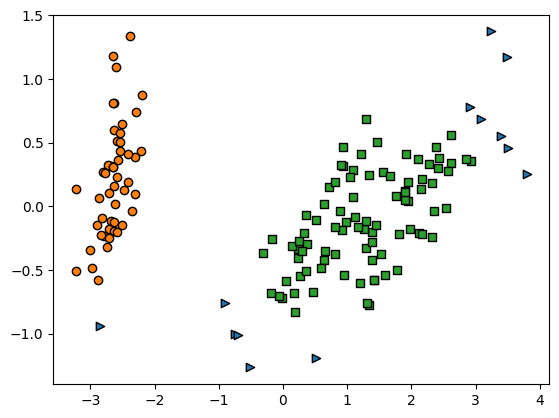

In [5]:
from sklearn.decomposition import PCA
# 2차원으로 시각화하기 위해 PCA n_components=2로 피처 데이터 세트 변환
pca=PCA(n_components=2,random_state=0)
pca_transformed=pca.fit_transform(iris.data)
# visualize_cluster_plot() 함수는 ftr1, ftr2 칼럼을 좌표에 표현하므로 PCA 변환값을 해당 칼럼으로 생성
irisDF['ftr1']=pca_transformed[:,0]
irisDF['ftr2']=pca_transformed[:,1]

visualize_cluster_plot(dbscan, irisDF,'dbscan_cluster',iscenter=False)

세모로 표현된 값: 노이즈
- PCA를 2차원으로 표현하면 이상치인 노이즈 데이터가 명확하게 드러남.

eps를 0.6 -> **0.8** 변경

target  dbscan_cluster
0        0                50
1        1                50
2        1                47
        -1                 3
Name: count, dtype: int64


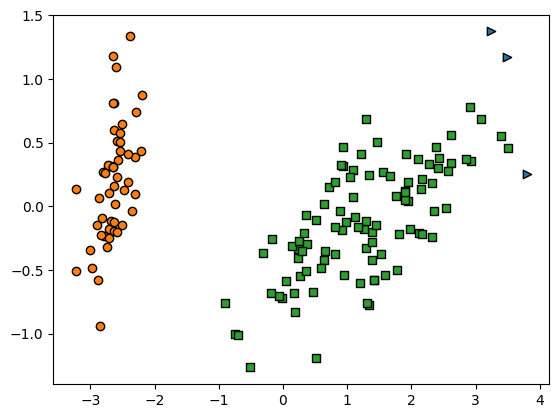

In [6]:
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.8,min_samples=8,metric='euclidean')
dbscan_labels=dbscan.fit_predict(iris.data)

irisDF['dbscan_cluster']=dbscan_labels
irisDF['target']=iris.target

iris_result=irisDF.groupby(['target'])['dbscan_cluster'].value_counts()
print(iris_result)

visualize_cluster_plot(dbscan, irisDF, 'dbscan_cluster', iscenter=False)

In [7]:
dbscan=DBSCAN(eps=0.6,min_samples=16,metric='euclidean')

### DBSCAN 적용하기 - make_circles() 데이터 세트

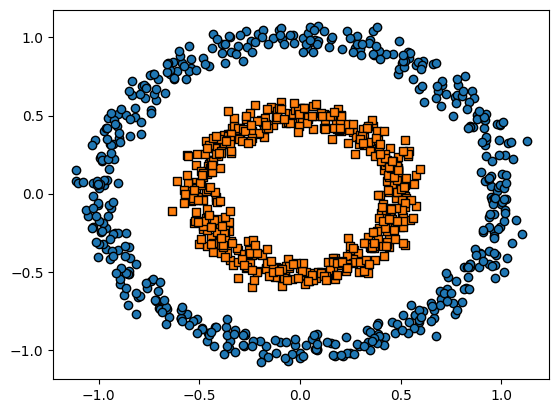

In [8]:
from sklearn.datasets import make_circles

X,y=make_circles(n_samples=1000,shuffle=True,noise=0.05,random_state=0,factor=0.5)
clusterDF=pd.DataFrame(data=X,columns=['ftr1','ftr2'])
clusterDF['target']=y

visualize_cluster_plot(None,clusterDF,'target',iscenter=False)

**K-평균**으로 데이터 세트 군집화

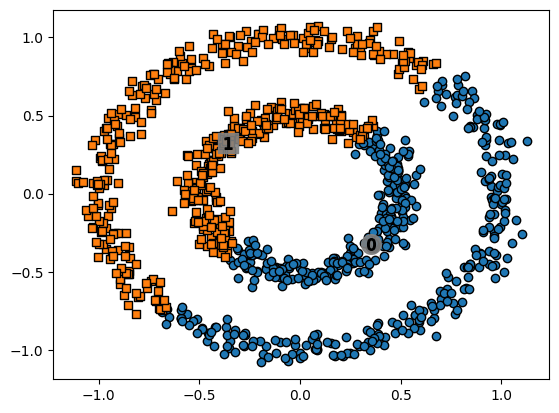

In [9]:
# KMeans로 make_circles() 데이터 세트를 군집화 수행
from sklearn.cluster import KMeans

kmeans=KMeans(n_clusters=2,max_iter=1000,random_state=0)
kmeans_labels=kmeans.fit_predict(X)
clusterDF['kmeans_cluster']=kmeans_labels

visualize_cluster_plot(kmeans,clusterDF,'kmeans_cluster',iscenter=True)

**GMM**으로 데이터 세트 군집화

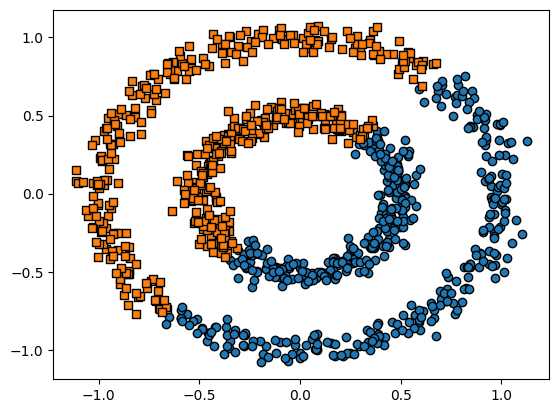

In [10]:
# GMM으로 make_circles() 데이터 세트를 군집화 수행
from sklearn.mixture import GaussianMixture

gmm=GaussianMixture(n_components=2,random_state=0)
gmm_label=gmm.fit(X).predict(X)
clusterDF['gmm_cluster']=gmm_label

visualize_cluster_plot(gmm,clusterDF,'gmm_cluster',iscenter=False)

**DBSCAN**으로 군집화

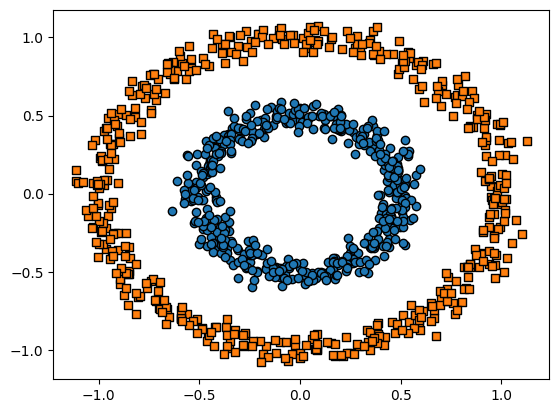

In [11]:
# DBSCAN으로 make_circles() 데이터 세트 군집화 수행
from sklearn.cluster import DBSCAN

dbscan=DBSCAN(eps=0.2,min_samples=10,metric='euclidean')
dbscan_labels=dbscan.fit_predict(X)
clusterDF['dbscan_cluster']=dbscan_labels
visualize_cluster_plot(dbscan,clusterDF,'dbscan_cluster',iscenter=False)

## 06. 군집화 실습 - 고객 세그먼테이션

### 고객 세그먼테이션의 정의와 기법

고객 세그먼테이션(Customer Segmentation): 다양한 기준으로 고객을 분류하는 기법.
- 타깃 마케팅: 고객을 여러 특성에 맞게 세분화해서 그 유형에 따라 맞춤형 마케팅이나 서비스를 제공하는 것.
- 어떤 요소를 기반으로 군집화할 것인가가 중요.
- **RFM 기법**(Recency, Frequency, Monetary Value)

### 데이터 세트 로딩과 데이터 클렌징

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import pandas as pd
import datetime
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
# retail_df=pd.read_excel(io='Online Retail.xlsx')
# retail_df.head(3)

In [15]:
retail_df=pd.read_csv('/content/drive/MyDrive/Colab/ESAA/OnlineRetail.csv', encoding='ISO-8859-1')
retail_df.head(3)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [16]:
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


Null 데이터 제거: CustomnerID가 Null. <- 제거

오류 데이터 삭제: Quantity, UnitPrice가 0보다 작은 경우. <- 제거

**불린 인덱싱** 이용.

In [17]:
retail_df=retail_df[retail_df['Quantity']>0]
retail_df=retail_df[retail_df['UnitPrice']>0]
retail_df=retail_df[retail_df['CustomerID'].notnull()]
print(retail_df.shape)
retail_df.isnull().sum()

(397884, 8)


,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


In [18]:
retail_df['Country'].value_counts()[:5]

,count
Country,
United Kingdom,354321
Germany,9040
France,8341
EIRE,7236
Spain,2484


In [19]:
retail_df=retail_df[retail_df['Country']=='United Kingdom']
print(retail_df.shape)

(354321, 8)


### RFM 기반 데이터 가공

1. UnitPrice * Quantity = 주문 금액 데이터
2. CustomerNo를 int형으로 변경
3. Top5 주문 건수와 주문 금액을 가진 고객 데이터 추출
4. InvoiceNo + StockCode로 Groupby 수행 -> 1에 가깝게 유일한 식별자 레벨이 됨.

In [20]:
retail_df['sale_amount']=retail_df['Quantity']*retail_df['UnitPrice']
retail_df['CustomerID']=retail_df['CustomerID'].astype(int)

In [21]:
print(retail_df['CustomerID'].value_counts().head(5))
print(retail_df.groupby('CustomerID')['sale_amount'].sum().sort_values(ascending=False)[:5])

CustomerID
17841    7847
14096    5111
12748    4595
14606    2700
15311    2379
Name: count, dtype: int64
CustomerID
18102    259657.30
17450    194550.79
16446    168472.50
17511     91062.38
16029     81024.84
Name: sale_amount, dtype: float64


In [22]:
retail_df.groupby(['InvoiceNo','StockCode'])['InvoiceNo'].count().mean()

np.float64(1.028702077315023)

RFM 기반의 고객 세그먼테이션 - 고객 레벨로 주문 기간, 주문 횟수, 주문 금액 데이터를 기반으로 세그먼테이션 수행.
-> 주문번호+상품코드 기준의 데이터를 고객 기준의 Recency, Frequency, Monetary value 데이터로 변경.

DataFrameGroupby 객체에 agg() 이용.
- agg(대상 칼럼들, aggregation 함수명): 칼럼 여러 개의 서로 다른 aggregation 연산을 수행 가능.

In [23]:
# DataFrame의 groupby()의 multiple 연산을 위해 agg() 이용
# Recency는 InvoiceDate 칼럼의 max()에서 데이터 가공
# Frequency는 InvoiceNo 칼럼의 count(), Monetary value는 sale_amount 칼럼의 sum()
aggregations={
    'InvoiceDate':'max',
    'InvoiceNo':'count',
    'sale_amount':'sum'
}
cust_df=retail_df.groupby('CustomerID').agg(aggregations)
# groupby된 결과 칼럼 값을 Recency, Frequency, Monetary로 변경
cust_df=cust_df.rename(columns={'InvoiceDate':'Recency',
                                'InvoiceNo':'Frequency',
                                'sale_amount':'Monetary'})
cust_df=cust_df.reset_index()
cust_df.head(3)

,CustomerID,Recency,Frequency,Monetary
0,12346,1/18/2011 10:01,1,77183.60
1,12747,8/22/2011 10:38,103,4196.01
2,12748,9/9/2011 13:20,4595,33719.73


In [24]:
import datetime as dt
import pandas as pd # Ensure pandas is imported if not already

cust_df['Recency'] = pd.to_datetime(cust_df['Recency'])
cust_df['Recency'] = dt.datetime(2011,12,10) - cust_df['Recency']
cust_df['Recency'] = cust_df['Recency'].apply(lambda x:x.days+1)
print('cust_df 로우와 칼럼 건수는 ',cust_df.shape)
cust_df.head(3)

cust_df 로우와 칼럼 건수는  (3920, 4)


,CustomerID,Recency,Frequency,Monetary
0,12346,326,1,77183.60
1,12747,110,103,4196.01
2,12748,92,4595,33719.73


### RFM 기반 고객 세그먼테이션

소매업체의 대규모 주문을 포함함. -> 왜곡된 데이터 분포도를 가짐. 군집화가 한쪽 군집에만 집충.

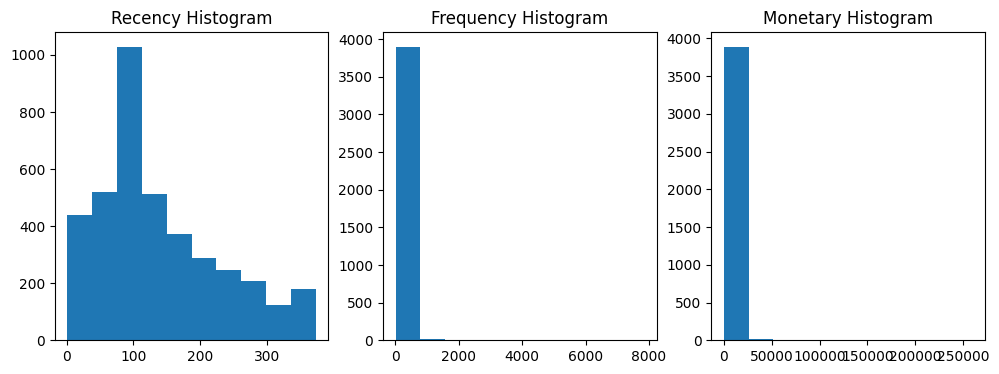

In [25]:
fig,(ax1,ax2,ax3)=plt.subplots(figsize=(12,4),nrows=1,ncols=3)
ax1.set_title('Recency Histogram')
ax1.hist(cust_df['Recency'])

ax2.set_title('Frequency Histogram')
ax2.hist(cust_df['Frequency'])

ax3.set_title('Monetary Histogram')
ax3.hist(cust_df['Monetary'])
plt.show()

In [26]:
cust_df[['Recency','Frequency','Monetary']].describe()

,Recency,Frequency,Monetary
count,3920.000000,3920.000000,3920.000000
mean,139.742602,90.388010,1864.385601
std,92.716569,217.808385,7482.817477
min,1.000000,1.000000,3.750000
25%,76.000000,17.000000,300.280000
50%,110.000000,41.000000,652.280000
75%,197.000000,99.250000,1576.585000
max,374.000000,7847.000000,259657.300000


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

X_features=cust_df[['Recency','Frequency','Monetary']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels

print('실루엣 스코어는:{0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는:0.510


데이터 세트의 왜곡 정도를 낮추기 위해 데이터 값에 로그 적용. (로그 변환)

In [28]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.decomposition import PCA

def visualize_silhouette(cluster_lists, X_features):
    # Visualize Silhouette for each cluster_lists
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)

    for ind, n_cluster in enumerate(cluster_lists):
        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_features)

        silhouette_avg = silhouette_score(X_features, cluster_labels)
        sample_silhouette_values = silhouette_samples(X_features, cluster_labels)

        y_lower = 10
        axs[ind].set_title('Number of Cluster : ' + str(n_cluster) + '\n' \
                           'Silhouette Score :' + str(round(silhouette_avg, 3)))
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])

        for i in range(n_cluster):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, \
                                   facecolor=color, edgecolor=color, alpha=0.7)

            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10

        axs[ind].axvline(x=silhouette_avg, color="red", linestyle="--")

    plt.tight_layout()
    plt.show()

def visualize_kmeans_plot_multi(cluster_lists, X_features, iscenter=False):
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4 * n_cols, 4), nrows=1, ncols=n_cols)

    pca = PCA(n_components=2, random_state=0)
    pca_transformed = pca.fit_transform(X_features)

    dataframe = pd.DataFrame(data=pca_transformed, columns=['ftr1', 'ftr2'])

    markers = ['o', 's', '^', 'x', '*', 'D', '+', 'v', '<', '>']

    for ind, n_cluster in enumerate(cluster_lists):
        kmeans = KMeans(n_clusters=n_cluster, max_iter=500, random_state=0, n_init='auto')
        cluster_labels = kmeans.fit_predict(X_features)
        dataframe['cluster'] = cluster_labels

        unique_labels = np.unique(dataframe['cluster'])

        for label in unique_labels:
            label_cluster = dataframe[dataframe['cluster'] == label]
            axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
                             marker=markers[label % len(markers)])

        if iscenter and hasattr(kmeans, 'cluster_centers_'):
            center_x_y = pca.transform(kmeans.cluster_centers_)
            for label, center in enumerate(center_x_y):
                axs[ind].scatter(x=center[0], y=center[1], s=200, color='gray', alpha=0.9,
                                 marker=markers[label % len(markers)])
                axs[ind].scatter(x=center[0], y=center[1], s=70, color='k', edgecolor='k',
                                 marker='$%d$' % label)

        axs[ind].set_title('Number of Cluster : ' + str(n_cluster))
        axs[ind].set_xlabel('ftr1')
        axs[ind].set_ylabel('ftr2')

    plt.tight_layout()
    plt.show()

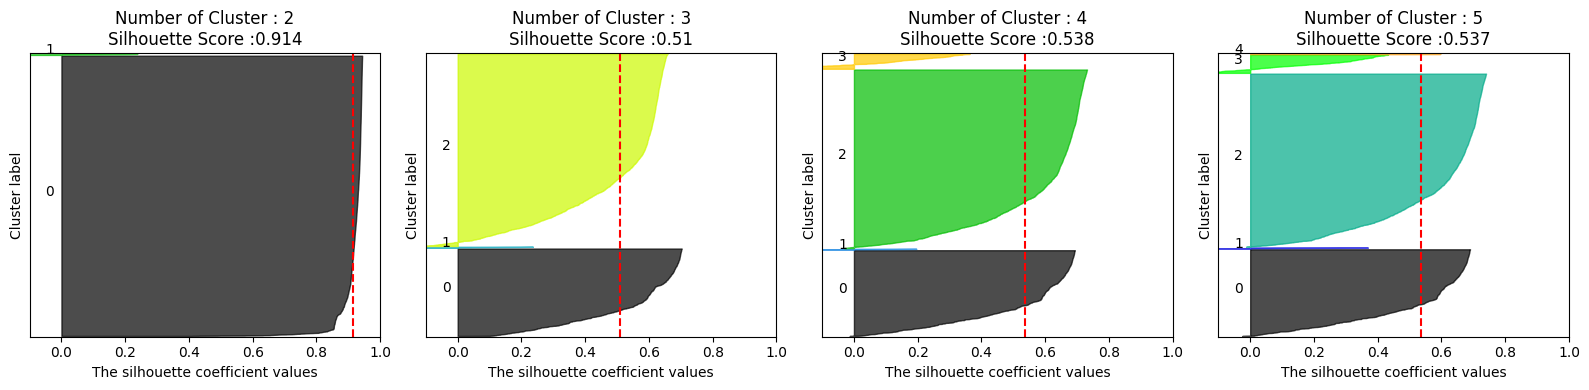

/tmp/ipython-input-3638930790.py:70: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',
/tmp/ipython-input-3638930790.py:70: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  axs[ind].scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k',


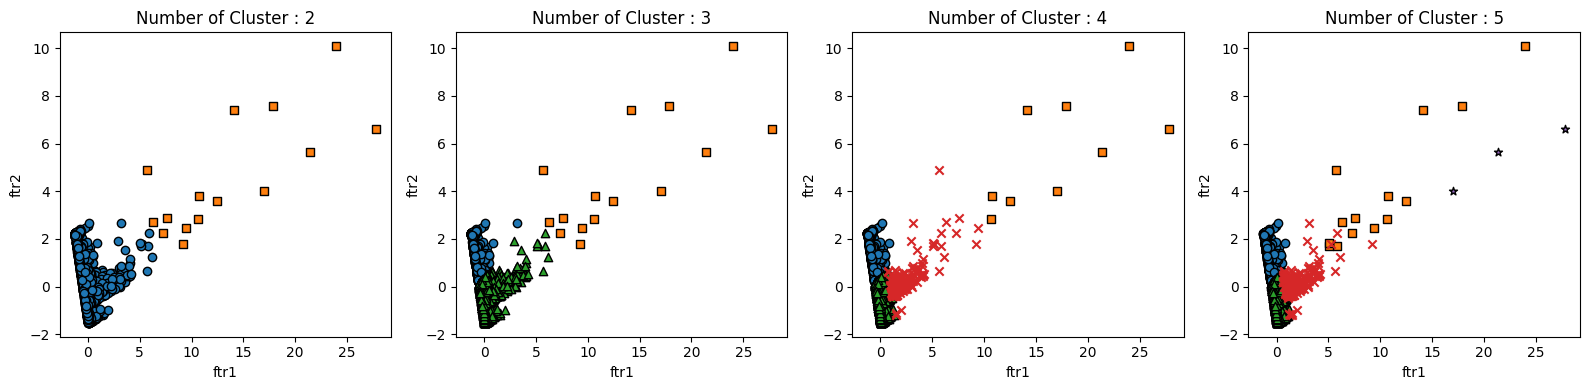

In [29]:
visualize_silhouette([2,3,4,5],X_features_scaled)
visualize_kmeans_plot_multi([2,3,4,5],X_features_scaled)

In [30]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

# Recency, Frequency, Monetary 칼럼에 np.log1p()로 Log Transformation
cust_df['Recency_log']=np.log1p(cust_df['Recency'])
cust_df['Frequency_log']=np.log1p(cust_df['Frequency'])
cust_df['Monetary_log']=np.log1p(cust_df['Monetary'])

# Log Transformation 데이터에 StandardScaler 적용
X_features=cust_df[['Recency_log','Frequency_log','Monetary_log']].values
X_features_scaled=StandardScaler().fit_transform(X_features)

kmeans=KMeans(n_clusters=3,random_state=0)
labels=kmeans.fit_predict(X_features_scaled)
cust_df['cluster_label']=labels

print('실루엣 스코어는:{0:.3f}'.format(silhouette_score(X_features_scaled,labels)))

실루엣 스코어는:0.390
